In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')



In [2]:
background = pd.read_csv('background.csv', low_memory = False) #load the different data sets
train = pd.read_csv('train.csv')
prediction = pd.read_csv('prediction.csv')

In [3]:
background.head()

,challengeID,m1intmon,m1intyr,m1lenhr,m1lenmin,cm1twoc,cm1fint,cm1tdiff,cm1natsm,m1natwt,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
0,1,-3,NaN,-3,40,NaN,0,NaN,NaN,NaN,...,-3.0,-3.000000,-3.000000,-3.000000,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
1,2,-3,NaN,0,40,NaN,1,NaN,NaN,NaN,...,-3.0,8.473318,-3.000000,-3.000000,-3.0,-3.000000,9.845074,-3,-3.000000,9.723551
2,3,-3,NaN,0,35,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,9.097495,10.071504,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
3,4,-3,NaN,0,30,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,9.512706,10.286578,-3.0,10.677285,-3.000000,-3,8.522331,10.608137
4,5,-3,NaN,0,25,NaN,1,NaN,NaN,NaN,...,-3.0,-3.000000,11.076016,9.615958,-3.0,9.731979,-3.000000,-3,10.115313,9.646466


In [4]:
train.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.5,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
prediction.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
1,2,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
2,3,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
3,4,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771
4,5,2.866738,3.427539,0.103745,0.05963,0.209084,0.234771


In [6]:
train.describe()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
count,2121.000000,1165.000000,1418.000000,1459.000000,1459.000000,1277.000000,1461.000000
mean,2085.421971,2.866738,3.427539,0.103745,0.059630,0.209084,0.234771
std,1209.429502,0.665322,0.485130,0.155665,0.236881,0.406814,0.424001
min,1.000000,1.000000,1.250000,0.000000,0.000000,0.000000,0.000000
25%,1032.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2110.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000
75%,3109.000000,3.250000,3.750000,0.181818,0.000000,0.000000,0.000000
max,4241.000000,4.000000,4.000000,0.818182,1.000000,1.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 7 columns):
challengeID         2121 non-null int64
gpa                 1165 non-null float64
grit                1418 non-null float64
materialHardship    1459 non-null float64
eviction            1459 non-null float64
layoff              1277 non-null float64
jobTraining         1461 non-null float64
dtypes: float64(6), int64(1)
memory usage: 116.1 KB


In [8]:
background.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Columns: 12943 entries, challengeID to k5f1
dtypes: float64(3307), int64(9489), object(147)
memory usage: 418.9+ MB


In [9]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 7 columns):
challengeID         4242 non-null int64
gpa                 4242 non-null float64
grit                4242 non-null float64
materialHardship    4242 non-null float64
eviction            4242 non-null float64
layoff              4242 non-null float64
jobTraining         4242 non-null float64
dtypes: float64(6), int64(1)
memory usage: 232.1 KB


## GPA EDA

In [49]:
columns = ['challengeID','cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf','cm1age']

In [50]:
short_df = background[columns]

In [51]:
short_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 8 columns):
challengeID    4242 non-null int64
cm1ethrace     4242 non-null int64
cf1ethrace     4242 non-null int64
cm1edu         4242 non-null int64
cf1edu         4242 non-null int64
cm5povco       4242 non-null float64
cm1relf        4242 non-null int64
cm1age         4242 non-null int64
dtypes: float64(1), int64(7)
memory usage: 265.2 KB


With the selection of these variables there are no NaN values- though some are marked as missing in other ways (-9, -6, -3).

These variables are:

'cm1ethrace': Race of the mother

'cf1ethrace': Race of the father

'cm1edu': Education level of the mother

'cf1edu':  Education level of the father

'cm5povco': A measure of poverty level of the mother

'cm1relf': A measure of mother's relationship with father (married, cohabitating, unknown, etc)

'cm1age': Mother's age when child was born


In [52]:
joined_df =  train.join(short_df.set_index('challengeID'), on='challengeID') #only want the background information for those in the training set


In [53]:
joined_df.head()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining,cm1ethrace,cf1ethrace,cm1edu,cf1edu,cm5povco,cm1relf,cm1age
0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,3,-9.000000,1,27
1,3,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,3,-9.000000,1,23
2,6,NaN,3.50,0.090909,0.0,0.0,0.0,3,3,2,2,4.755653,2,18
3,7,2.5,3.25,0.000000,0.0,0.0,0.0,2,3,3,1,3.481916,2,23
4,8,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,-9.000000,3,21


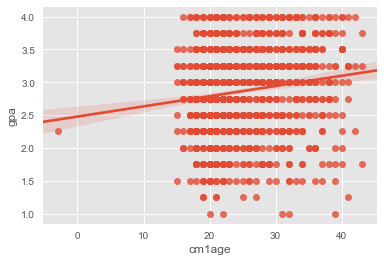

In [34]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cm1age'], fit_reg = True)

It appears that the younger the mother the worse a child's future GPA.

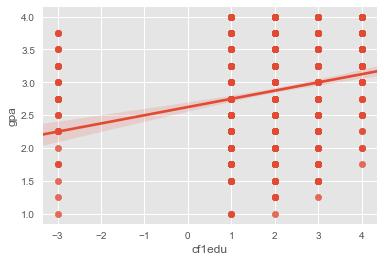

In [35]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cf1edu'], fit_reg = True)

The higher the father's education, the better the GPA. 

1 didn't graduate HS

2 HS or equiv

3 some coll, tech

4 coll or grad

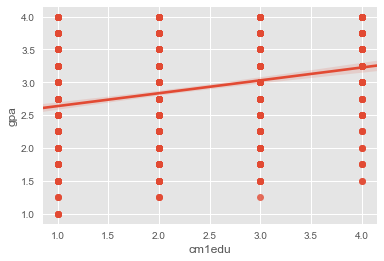

In [36]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cm1edu'], fit_reg = True) 

Similar pattern with mother's education level.

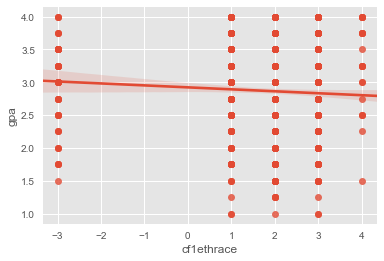

In [37]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cf1ethrace'], fit_reg = True)

1 is white, 2 is hispanic, 3 is black, 4 is other. It appears minority children do worse in school.

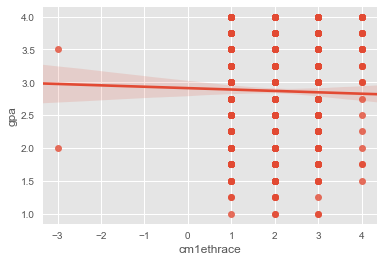

In [39]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cm1ethrace'], fit_reg = True)

Simliar pattern to father's race.

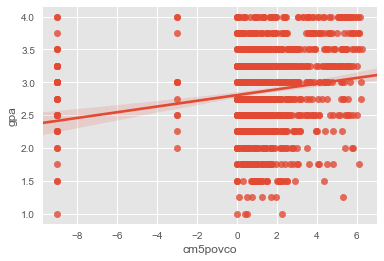

In [38]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cm5povco'], fit_reg = True) #mother poverty

It appears that higher economic standards are correlated to higher GPA.

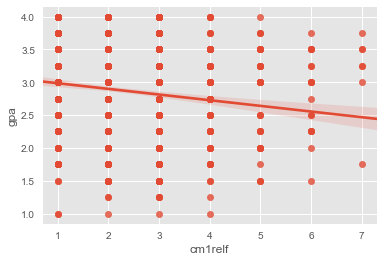

In [40]:
sns.regplot(y=joined_df['gpa'], x=joined_df['cm1relf'], fit_reg = True) #mother's relationship to father

1 is married, 2 is cohabitating, and the rest of the numbers indicate decreasing levels of involvement to 7 being unknown who the father is. 

Obviously with 12000+ features I can not look though all of them, but these variables all show some promise.

## Simple Regression

In [54]:
y = joined_df['gpa'] # variable we are interested in

y.dropna(how='any', inplace=True) # drop those with no reported outcome

# get the rows for which we can predict
y_indices = y.index.values.tolist()

columns = ['cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf','cm1age']

X = joined_df[columns]

small_X = X.loc[y_indices]

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [57]:
lr.fit(small_X, y)
print('Estimated intercept coefficient:', lr.intercept_)
print('Number of coefficients:', len(lr.coef_))
z = list(zip(small_X.columns,lr.coef_))
pd.DataFrame(z, columns = ['features', 'estimatedCoefficients'])

Estimated intercept coefficient: 2.39515947831
Number of coefficients: 7


,features,estimatedCoefficients
0,cm1ethrace,0.042533
1,cf1ethrace,-0.017297
2,cm1edu,0.134155
3,cf1edu,0.061015
4,cm5povco,0.014272
5,cm1relf,-0.017941
6,cm1age,0.001113


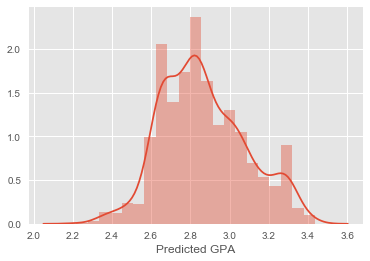

In [58]:
sns.distplot(lr.predict(small_X),axlabel="Predicted GPA")

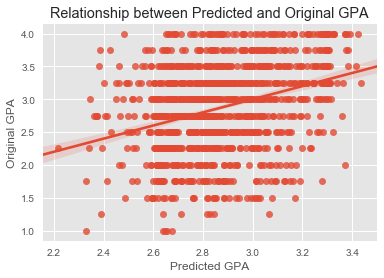

In [59]:
sns.regplot(y=y, x=lr.predict(small_X), fit_reg = True)
plt.xlabel("Predicted GPA")
plt.ylabel("Original GPA")
plt.title("Relationship between Predicted and Original GPA")

So... it's not awesome. It had a hard time predicting the outliers, especially.

In [60]:
np.mean((y - lr.predict(small_X)) ** 2) #mean squared error

0.39557889212562736

In [63]:
import sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    small_X, y, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(780, 7)
(385, 7)
(780,)
(385,)


In [64]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [65]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.3999644056613147
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.3909894590302148


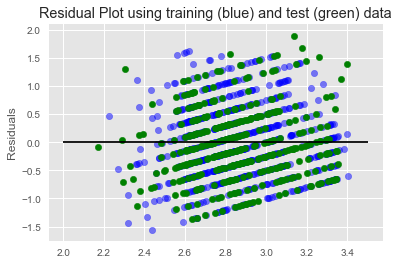

In [70]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=2, xmax = 3.5)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

While this simple linear regression didn't do great, it is nice to see that the model did have some predictive power. Moving forward I will try other algorithms to try and improve the model.

## Categorical EDA

In [71]:
joined_df['eviction'].value_counts()

0.0    1372
1.0      87
Name: eviction, dtype: int64

In [72]:
joined_df['layoff'].value_counts()

0.0    1010
1.0     267
Name: layoff, dtype: int64

In [73]:
joined_df['jobTraining'].value_counts()

0.0    1118
1.0     343
Name: jobTraining, dtype: int64

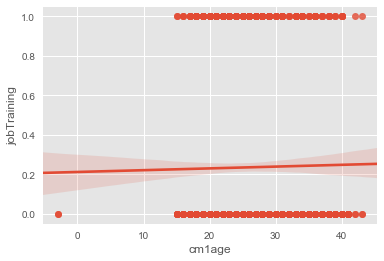

In [76]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cm1age'], fit_reg = True)

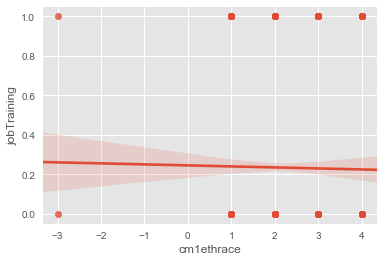

In [77]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cm1ethrace'], fit_reg = True)

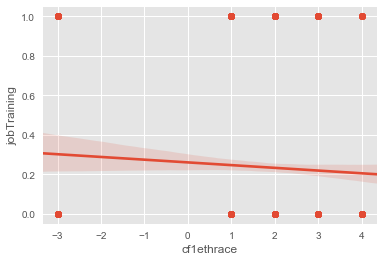

In [78]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cf1ethrace'], fit_reg = True)

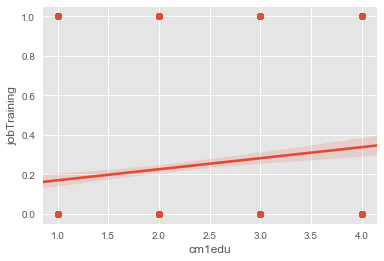

In [79]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cm1edu'], fit_reg = True)

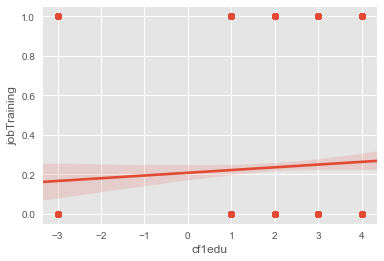

In [80]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cf1edu'], fit_reg = True)

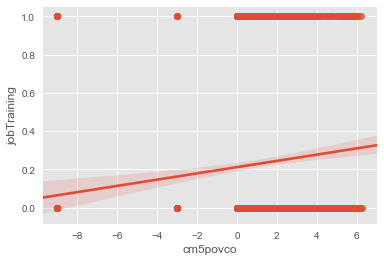

In [83]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cm5povco'], fit_reg = True)

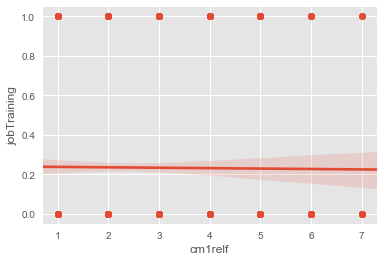

In [85]:
sns.regplot(y=joined_df['jobTraining'], x=joined_df['cm1relf'], fit_reg = True)

For the initial exploration of job training, I considered dropping the relationship with the father as it appears to have the least influence. But,the best measures here would actually be a frequency table, which is why even a slight slope warrants consideration since there are so many cases of 0 (or no) that weigh down the line. 

### Quick Logistic Regression

In [86]:
y = joined_df['jobTraining'] # variable we are interested in

y.dropna(how='any', inplace=True) # drop those with no reported outcome

# get the rows for which we can predict
y_indices = y.index.values.tolist()

columns = ['cm1ethrace', 'cf1ethrace', 'cm1edu', 'cf1edu', 'cm5povco', 'cm1relf','cm1age']

X = joined_df[columns]

small_X = X.loc[y_indices]

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(small_X, y, test_size = 0.33, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[361   0]
 [122   0]]
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86       361
        1.0       0.00      0.00      0.00       122

avg / total       0.56      0.75      0.64       483



C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


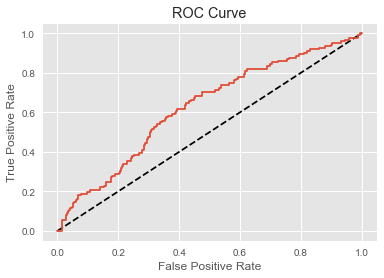

In [89]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, small_X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.6249489124017984
AUC scores computed using 5-fold cross-validation: [ 0.59549689  0.53894928  0.65916149  0.63024268  0.53953442]


In [96]:
# Setup the hyperparameter grid
c_space = np.logspace(-10, 5, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(small_X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.0031622776601683794}
Best score is 0.7645448323066395


In [97]:
X_train, X_test, y_train, y_test = train_test_split(small_X, y, test_size = 0.33, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(C = .00316227766)

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[361   0]
 [122   0]]
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86       361
        1.0       0.00      0.00      0.00       122

avg / total       0.56      0.75      0.64       483



C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So... bascially the model is just predicting everything as no. It could be that these are bad features (none of the regression lines ever made up to '1', so it may feel that it is safer to always predict '0'). Again, we will try a more robust model.